In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [3]:
X = pd.DataFrame(load_boston().data)
y = load_boston().target
X_train_,X_test_,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_)
X_test = scaler.transform(X_test_)
tsne_model = TSNE(n_components=2, learning_rate=250, random_state=42)


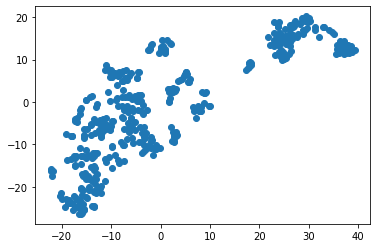

In [4]:
x_tsne = tsne_model.fit_transform(X_train)
plt.scatter(x_tsne[:,0],x_tsne[:,1])

In [5]:
kmeans = KMeans(n_clusters=3, max_iter = 100, random_state=42)
x_kmeans = kmeans.fit_predict(X_train)
x_kmeans

array([1, 2, 0, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2,
       0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0,
       1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2,
       1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2,
       2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0,
       1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2,

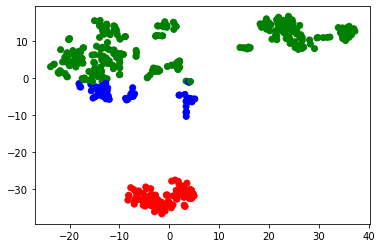

In [6]:
X_train_kmeans_1 = np.append(X_train,x_kmeans.reshape(404,-1),axis=1)
x_tsne_1 = tsne_model.fit_transform(X_train_kmeans_1)
plt.scatter(x_tsne_1[:,0],x_tsne_1[:,1],c=x_tsne_1[:,-1],cmap=ListedColormap(['red','blue','green']))

In [7]:
x_kmeans_0 = np.array(x_kmeans==0,dtype=int)
x_kmeans_1 = np.array(x_kmeans==1,dtype=int)
x_kmeans_2 = np.array(x_kmeans==2,dtype=int)
X_train_kmeans_2 = np.append(X_train,x_kmeans_0.reshape(404,-1),axis=1)
X_train_kmeans_2 = np.append(X_train_kmeans_2,x_kmeans_1.reshape(404,-1),axis=1)
X_train_kmeans_2 = np.append(X_train_kmeans_2,x_kmeans_2.reshape(404,-1),axis=1)
X_train_kmeans_2

array([[ 1.28770177, -0.50032012,  1.03323679, ...,  0.        ,
         1.        ,  0.        ],
       [-0.33638447, -0.50032012, -0.41315956, ...,  0.        ,
         0.        ,  1.        ],
       [-0.40325332,  1.01327135, -0.71521823, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.40547014,  2.95931752, -1.30336132, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.85189733, -0.50032012,  1.03323679, ...,  0.        ,
         1.        ,  0.        ],
       [-0.38135592, -0.50032012, -0.35216694, ...,  0.        ,
         0.        ,  1.        ]])

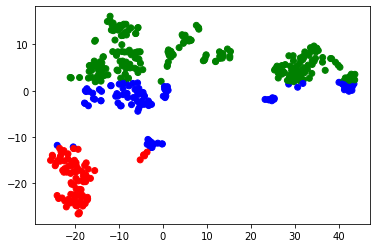

In [8]:
x_tsne_2 = tsne_model.fit_transform(X_train_kmeans_2)
plt.scatter(x_tsne_2[:,0],x_tsne_2[:,1],c=x_tsne_2[:,-1],cmap=ListedColormap(['red','blue','green']))

In [9]:
x_test_kmeans = kmeans.predict(X_test)
x_test_class_df = pd.DataFrame(X_test_).set_axis(load_boston().feature_names,axis=1)
x_test_class_df['Class'] = x_test_kmeans
x_test_class_df['Price'] = y_test

In [10]:
x_test_class_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Class,Price
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04,2,23.6
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53,0,32.4
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,1,13.6
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52,2,22.8
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27,1,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0.0,0.597,4.628,100.0,1.5539,24.0,666.0,20.2,28.79,34.37,1,17.9
436,14.42080,0.0,18.10,0.0,0.740,6.461,93.3,2.0026,24.0,666.0,20.2,27.49,18.05,1,9.6
411,14.05070,0.0,18.10,0.0,0.597,6.657,100.0,1.5275,24.0,666.0,20.2,35.05,21.22,1,17.2
86,0.05188,0.0,4.49,0.0,0.449,6.015,45.1,4.4272,3.0,247.0,18.5,395.99,12.86,2,22.5


In [11]:
x_test_class_df.groupby('Class')['CRIM'].mean()

Class
0     0.062060
1    10.165531
2     0.266079
Name: CRIM, dtype: float64

In [12]:
x_test_class_df.groupby('Class')['Price'].mean()

Class
0    31.350000
1    16.437143
2    21.860784
Name: Price, dtype: float64